In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# provide path where images are saved
path1 = 'C:/IACV project/image1.jpg'
path2 = 'C:/IACV project/image2.jpg'
N = 512

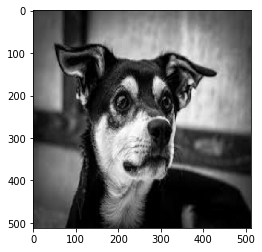

In [3]:
img1 = cv2.imread(path1)
img1 = cv2.resize(img1, (N, N))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')

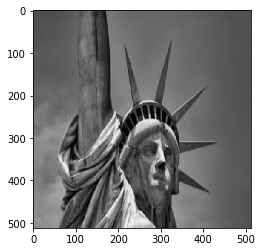

In [4]:
img2 = cv2.imread(path2)
img2 = cv2.resize(img2, (N, N))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

In [5]:
img1.shape

(512, 512)

Encryption-

In [6]:
a = 3
b = 5
itr = 15
mu = 700
gamma = 800

In [7]:
def cat_transform(img, N, a, b):
    tx_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            tx_img[(i+a*j)%N][(b*i+(a*b+1)*j)%N] = img[i][j]
    return tx_img

In [8]:
def cat_tx_iter(img, itr, a, b):
    for i in range(itr):
        tx_img = cat_transform(img, N, a, b)
        img = tx_img
    return tx_img

In [9]:
scrambled_img = cat_tx_iter(img1, itr, a, b)

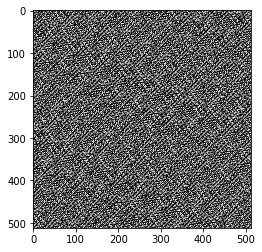

In [10]:
plt.imshow(scrambled_img, cmap='gray')

In [11]:
g1 = mu - scrambled_img
g2 = mu - img2

In [12]:
def plip_add(g1, g2, N, gamma):
    encrypt_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            encrypt_img[i][j] = g1[i][j] + g2[i][j] - (g1[i][j]*g2[i][j])//gamma
    return encrypt_img

In [13]:
encrypt_img = plip_add(g1, g2, N, gamma)

In [14]:
encrypt_img

array([[766., 761., 743., ..., 753., 778., 771.],
       [778., 771., 779., ..., 762., 744., 778.],
       [771., 767., 749., ..., 778., 778., 775.],
       ...,
       [746., 743., 717., ..., 767., 735., 778.],
       [726., 771., 761., ..., 763., 739., 755.],
       [742., 725., 758., ..., 763., 752., 727.]])

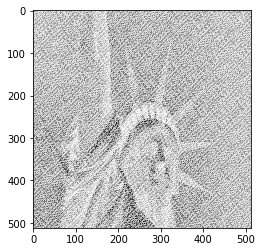

In [15]:
plt.imshow(encrypt_img, cmap='gray')

Decryption-

In [16]:
k = gamma
mu = 700
a = 3
b = 5
itr = 15

In [17]:
def plip_sub(g1, g2, N, k):
    decrypt_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            decrypt_img[i][j] = k*(g1[i][j]-g2[i][j])//(k-g2[i][j])
    return decrypt_img

In [18]:
decrypt_img = plip_sub(encrypt_img, g2, N, k)

In [19]:
obtained_scrambled_img = mu - decrypt_img

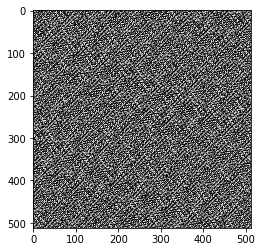

In [20]:
plt.imshow(obtained_scrambled_img, cmap='gray')

In [21]:
def inv_cat_transform(img, N, a, b):
    inv_tx_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            inv_tx_img[i][j] = img[(i+a*j)%N][(b*i+(a*b+1)*j)%N]
    return inv_tx_img

In [22]:
def inv_cat_tx_iter(img, itr, a, b):
    for i in range(itr):
        tx_img = inv_cat_transform(img, N, a, b)
        img = tx_img
    return tx_img

In [23]:
final = inv_cat_tx_iter(obtained_scrambled_img, itr, a, b)

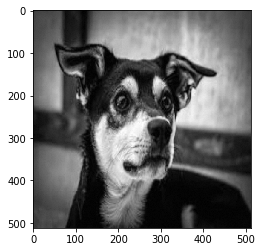

In [24]:
plt.imshow(final, cmap='gray')